### 딥-러닝 과정 CNN 

### 첫번째 실습. Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


In [2]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
print(x_train[0].shape)

(28, 28)


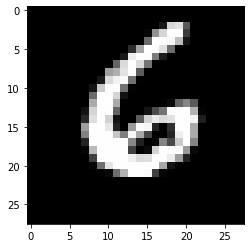

In [4]:
# 2. 이미지 데이터 확인하기 🖼
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(x_train[90], cmap=plt.cm.gray)


In [5]:
# 3-1. 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟 => 2차원은 dense레이어에 인풋으로 사용할수 없어서

x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
print(x_train.shape)

(60000, 784)


In [6]:
# 3-1. 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟

x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
# 3-2. 이미지 데이터 전처리 : Normalzation => 값이 너무 커져서 오버플로우가 발생할 수 있기 때문에
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# 4. Label 전처리 (one-hot encoding) 
import tensorflow as tf
from tensorflow import one_hot

#y_train = tf.one_hot(y_train, depth=10)
#print(y_train.shape)

In [10]:
import pandas as pd 

#pd.get_dummies(y_train)
#pd.get_dummies(y_test)
print(y_train)

[5 0 4 ... 5 6 8]


In [14]:
from tensorflow import keras
from tensorflow.keras import utils


# 반드시 한번만 실행하슈. 아니면 데이터 꼬일수 있음
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [15]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
# 5. 모델 생성 : MLP

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
model = keras.Sequential()
# input_shape=x_train[0].shape으로 사용해도 됨.
model.add(layers.Dense(input_dim=x_train.shape[1], units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=64, activation='relu',kernel_regularizer=keras.regularizers.L2(0.1)))
model.add(layers.Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(units=10, activation='softmax'))


model.summary()

In [ ]:
# 6. Compile - Optimizer, Loss function 설정

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
from keras.callbacks import EarlyStopping

# 빠른 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 7. 모델 학습시키기

#hist = model.fit(x_train,y_train,validation_data=(x_val, y_val), batch_size=4,epochs=200,verbose=1,validation_split=0.1,callbacks=[early_stopping,modelcheckpiing])
hist = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_split=0.2,callbacks=[early_stopping])

In [ ]:
# 8. 모델 평가하기
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

In [ ]:
# 9. 학습 시각화하기

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')


plt.show()

In [ ]:
# 10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = x_test[index].reshape(1, 784)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()